In [1]:
import pandas as pd
from sklearn import preprocessing


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [16]:
train=pd.read_csv('train (1).csv')
test=pd.read_csv('test (1).csv')
train.head(100)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,0,2,2
96,2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3
97,2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33
98,2011-01-05 07:00:00,1,0,1,1,7.38,9.090,43,12.9980,1,87,88


In [4]:
y=train['count']
del train['count']

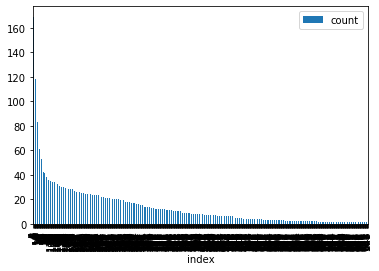

In [14]:
import matplotlib.pyplot as plt
y.value_counts().reset_index().plot(x='index',y='count',kind='bar')

(array([  69.,  648., 1440., 1891., 1587., 1753., 1901., 1194.,  355.,
          48.]),
 array([ 0.82 ,  4.838,  8.856, 12.874, 16.892, 20.91 , 24.928, 28.946,
        32.964, 36.982, 41.   ]),
 <a list of 10 Patch objects>)

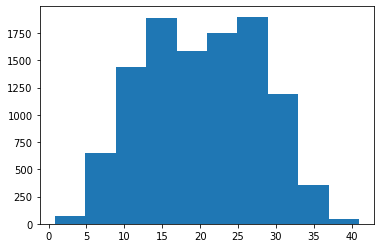

In [21]:
plt.hist(train['temp'])

In [22]:
from datetime import datetime

temp=pd.DatetimeIndex(train['datetime'])
train['year']=temp.year
train['month']=temp.month
train['hour']=temp.hour
train['weekday']=temp.weekday

temp=pd.DatetimeIndex(test['datetime'])
test['year']=temp.year
test['month']=temp.month
test['hour']=temp.hour
test['weekday']=temp.weekday

features = ['season', 'holiday', 'workingday', 'weather',
        'temp', 'atemp', 'humidity', 'windspeed', 'year',
         'month', 'weekday', 'hour']


In [23]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,22,2


In [25]:
import numpy as np
for col in ['casual', 'registered', 'count']:
    train['log-' + col] = train[col].apply(lambda x: np.log1p(x))

In [31]:
import numpy as np
from sklearn.ensemble  import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=200, max_depth=3)
clf.fit(train[features], train['log-count'])
result = clf.predict(test[features])
result = np.expm1(result)
 
df=pd.DataFrame({'datetime':test['datetime'], 'count':result})
df.to_csv('results1.csv', index = False, columns=['datetime','count'])

In [32]:
#Split data into training and validation sets
temp = pd.DatetimeIndex(train['datetime'])
training = train[temp.day <= 16]
validation = train[temp.day > 16]
 
param_grid = {'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [10, 15, 20],
              'min_samples_leaf': [3, 5, 10, 20],
              }
 
est = ensemble.GradientBoostingRegressor(n_estimators=500)
# this may take awhile
gs_cv = GridSearchCV(
    est, param_grid, n_jobs=4).fit(
    training[features], training['log-count'])
 
# best hyperparameter setting
gs_cv.best_params_
 
#Baseline error
error_count = mean_absolute_error(validation['log-count'], gs_cv.predict(validation[features]))
 
result = gs_cv.predict(test[features])
result = np.expm1(result)
df=pd.DataFrame({'datetime':test['datetime'], 'count':result})
df.to_csv('results2.csv', index = False, columns=['datetime','count'])

NameError: name 'ensemble' is not defined